# Predicting a match winner 
(Multiclass classification problem)

Importing libraries

In [2]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Writing paths and variables

In [3]:
data_path = "Botola_Forecasting/"

data_matches = "morocco-botola-pro-matches"
data_teams = "morocco-botola-pro-teams"

data_years = [2014,2015,2016,2017,2018,2019,2020]


Selecting years of data

In [4]:
data_matches_selected = []

for filename in os.listdir(data_path):
    file_path = data_path + filename
    if data_matches in filename:
        if filename[-14:-10] in str(data_years):
            df = pd.read_csv(file_path)
            df['season'] = filename[-14:-10] # adding season to each df
            data_matches_selected.append(df)


In [5]:
data_teams_selected = []

for filename in os.listdir(data_path):
    file_path = data_path + filename
    if data_teams in filename:
        if filename[-14:-10] in str(data_years):
            df = pd.read_csv(file_path)
            data_teams_selected.append(df)

Concatenate data over years

In [6]:
data_matches = pd.concat(data_matches_selected)
data_matches.date_GMT = pd.to_datetime(data_matches.date_GMT,format='%b %d %Y - %I:%M%p',errors='coerce')
data_matches = data_matches.reset_index()


In [7]:
data_teams = pd.concat(data_teams_selected)
data_matches.head()

,index,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,season
0,0,1377280800,2013-08-23 18:00:00,complete,NaN,FAR Rabat,FUS Rabat,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Prince Moulay Abdallah,2014
1,1,1377360000,2013-08-24 16:00:00,complete,NaN,AS Salé,Hassania Agadir,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Boubker Ammar,2014
2,2,1377446400,2013-08-25 16:00:00,complete,NaN,RSB Berkane,Moghreb Tétouan,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade d'Honneur d'Oujda,2014
3,3,1377453600,2013-08-25 18:00:00,complete,NaN,Raja Casablanca,Olympic Safi,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Mohamed V,2014
4,4,1377460800,2013-08-25 20:00:00,complete,NaN,Chabab Rif Hoceima,Maghreb Fès,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Mimoun Al Arsi,2014


In [8]:
data_teams.head()

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
0,Wydad Athletic Club,Wydad Casablanca,2013/2014,Morocco,30,15,15,0,10,7,...,0,0,0,0,0,0,0,0,0,0
1,Hassania Union Sport d'Agadir,Hassania Agadir,2013/2014,Morocco,30,15,15,0,10,9,...,0,0,0,0,0,0,0,0,0,0
2,AS Forces Armées Royales de Rabat,FAR Rabat,2013/2014,Morocco,30,15,15,0,9,5,...,0,0,0,0,0,0,0,0,0,0
3,Olympique Club de Khouribga,Khouribga,2013/2014,Morocco,30,15,15,0,8,6,...,0,0,0,0,0,0,0,0,0,0
4,Olympique Club de Safi,Olympic Safi,2013/2014,Morocco,30,15,15,0,7,6,...,0,0,0,0,0,0,0,0,0,0


Merge matches and teams dataframes

In [9]:
data_teams.season = data_teams.season.apply(lambda x: x[-4:]) # matching saeson formats

In [10]:
data_matches.columns

Index(['index', 'timestamp', 'date_GMT', 'status', 'attendance',
       'home_team_name', 'away_team_name', 'referee', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_p

In [11]:
matches_columns = ['date_GMT', 'season', 'status', 'home_team_name', 'away_team_name','home_team_goal_count','away_team_goal_count','average_goals_per_match_pre_match','average_cards_per_match_pre_match', 'stadium_name']
data_matches = data_matches[matches_columns]

In [12]:
data_teams.columns

Index(['team_name', 'common_name', 'season', 'country', 'matches_played',
       'matches_played_home', 'matches_played_away', 'suspended_matches',
       'wins', 'wins_home',
       ...
       'goals_scored_min_81_to_90', 'goals_conceded_min_0_to_10',
       'goals_conceded_min_11_to_20', 'goals_conceded_min_21_to_30',
       'goals_conceded_min_31_to_40', 'goals_conceded_min_41_to_50',
       'goals_conceded_min_51_to_60', 'goals_conceded_min_61_to_70',
       'goals_conceded_min_71_to_80', 'goals_conceded_min_81_to_90'],
      dtype='object', length=280)

In [13]:
teams_columns =[
 'average_possession',
 'clean_sheet_percentage',
 'common_name',
 'draw_at_half_time',
 'draws',
 'draws_away',
 'draws_home',
 'goals_conceded_per_match_half_time_away',
 'goals_scored',
 'goals_scored_per_match',
 'home_advantage_percentage',
 'leading_at_half_time_away',
 'leading_at_half_time_percentage',
 'losing_at_half_time_percentage',
 'losses_away',
 'points_per_game',
 'season',
 'shots_on_target',
 'win_percentage_away',
 'wins_away']

data_teams = data_teams[teams_columns]

In [14]:
data = pd.merge(data_matches, data_teams,  how='left', left_on=['season','home_team_name'], right_on = ['season','common_name'])
data = pd.merge(data, data_teams, suffixes = ('_home', '_away'), how='left', left_on=['season','away_team_name'], right_on = ['season','common_name'])
data


,date_GMT,season,status,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,average_goals_per_match_pre_match,average_cards_per_match_pre_match,stadium_name,...,goals_scored_per_match_away,home_advantage_percentage_away,leading_at_half_time_away_away,leading_at_half_time_percentage_away,losing_at_half_time_percentage_away,losses_away_away,points_per_game_away,shots_on_target_away,win_percentage_away_away,wins_away_away
0,2013-08-23 18:00:00,2014,complete,FAR Rabat,FUS Rabat,0,1,0.00,0.00,Stade Prince Moulay Abdallah,...,1.07,13,0,0,0,5,1.60,136,33,5
1,2013-08-24 16:00:00,2014,complete,AS Salé,Hassania Agadir,2,2,0.00,0.00,Stade Boubker Ammar,...,1.20,23,0,0,0,8,1.27,131,7,1
2,2013-08-25 16:00:00,2014,complete,RSB Berkane,Moghreb Tétouan,0,1,0.00,0.00,Stade d'Honneur d'Oujda,...,1.20,23,0,0,0,4,1.93,162,47,7
3,2013-08-25 18:00:00,2014,complete,Raja Casablanca,Olympic Safi,1,1,0.00,0.00,Stade Mohamed V,...,0.93,14,0,0,0,7,1.10,90,7,1
4,2013-08-25 20:00:00,2014,complete,Chabab Rif Hoceima,Maghreb Fès,1,2,0.00,0.00,Stade Mimoun Al Arsi,...,0.90,9,0,0,0,8,1.03,145,20,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2020-09-26 19:00:00,2020,incomplete,Hassania Agadir,FUS Rabat,0,0,2.09,5.12,NaN,...,1.09,6,0,0,0,3,1.57,89,23,3
1676,2020-09-27 17:00:00,2020,incomplete,CR Khemis Zemamra,Mouloudia Oujda,0,0,2.50,5.14,NaN,...,1.24,10,0,0,0,2,1.64,101,17,2
1677,2020-09-27 19:00:00,2020,incomplete,Raja Casablanca,Rapide Oued Zem,0,0,1.80,4.42,NaN,...,0.83,20,0,0,0,7,1.13,63,17,2
1678,2020-09-27 19:00:00,2020,incomplete,Raja Beni Mellal,RSB Berkane,0,0,1.55,5.12,NaN,...,1.00,14,0,0,0,1,1.82,70,40,4


In [15]:
data.columns

Index(['date_GMT', 'season', 'status', 'home_team_name', 'away_team_name',
       'home_team_goal_count', 'away_team_goal_count',
       'average_goals_per_match_pre_match',
       'average_cards_per_match_pre_match', 'stadium_name',
       'average_possession_home', 'clean_sheet_percentage_home',
       'common_name_home', 'draw_at_half_time_home', 'draws_home',
       'draws_away_home', 'draws_home_home',
       'goals_conceded_per_match_half_time_away_home', 'goals_scored_home',
       'goals_scored_per_match_home', 'home_advantage_percentage_home',
       'leading_at_half_time_away_home',
       'leading_at_half_time_percentage_home',
       'losing_at_half_time_percentage_home', 'losses_away_home',
       'points_per_game_home', 'shots_on_target_home',
       'win_percentage_away_home', 'wins_away_home', 'average_possession_away',
       'clean_sheet_percentage_away', 'common_name_away',
       'draw_at_half_time_away', 'draws_away', 'draws_away_away',
       'draws_home_away', 'g

Different teams that played in the selected years

In [16]:
teams = data_teams.common_name.unique()
print("{} team played in 1st div in {}".format(len(teams),list(data_years)))
for team in teams:
    print("-> ",team)

26 team played in 1st div in [2014, 2015, 2016, 2017, 2018, 2019, 2020]
->  Wydad Casablanca
->  Hassania Agadir
->  FAR Rabat
->  Khouribga
->  Olympic Safi
->  Raja Casablanca
->  Kawkab Marrakech
->  Difaâ El Jadida
->  Moghreb Tétouan
->  RSB Berkane
->  Chabab Rif Hoceima
->  FUS Rabat
->  KAC Kénitra
->  Maghreb Fès
->  AS Salé
->  Wydad Fès
->  Chabab Atlas Khénifra
->  Ittihad Khemisset
->  Ittihad Tanger
->  Mouloudia Oujda
->  Kasba Tadla
->  Racing de Casablanca
->  Rapide Oued Zem
->  Youssoufia Berrechid
->  Raja Beni Mellal
->  CR Khemis Zemamra


Teams with most home wins sorted

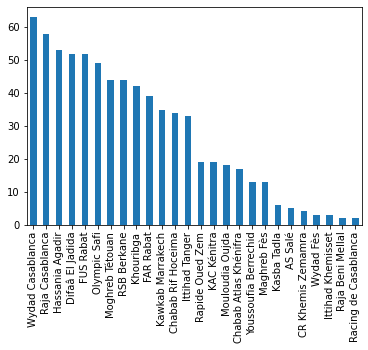

In [17]:
data[ (data.home_team_goal_count > data.away_team_goal_count) ].home_team_name.value_counts().plot.bar()

Teams with most away wins sorted

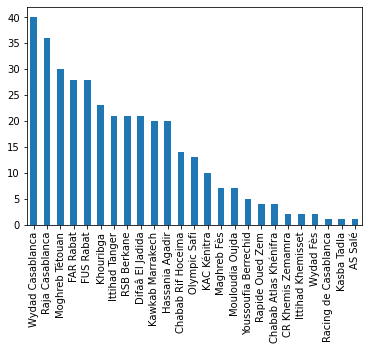

In [18]:
data[ (data.home_team_goal_count < data.away_team_goal_count) ].away_team_name.value_counts().plot.bar()

Adding useful features

In [19]:
# Final result feature

def result(row):
    if row.home_team_goal_count > row.away_team_goal_count:
        return 1
    elif row.home_team_goal_count < row.away_team_goal_count:
        return 2
    else:
        return 0

# Count of wins of the home team against the away team

def away_wins_vs(row):
    return len(  data[  ( (data.result == 1) & (data.home_team_name == row.away_team_name) & (data.away_team_name == row.home_team_name)  ) 
                | ((data.result == 2) & (data.home_team_name == row.home_team_name) & (data.away_team_name == row.away_team_name)) ] )

# Count of wins of the away team against the home team

def home_wins_vs(row):
    return len(  data[  ( (data.result == 1) & (data.home_team_name == row.home_team_name) & (data.away_team_name == row.away_team_name)  ) 
                | ((data.result == 2) & (data.home_team_name == row.away_team_name) & (data.away_team_name == row.home_team_name)) ] )

# Count of wins in n last matches ( n=0 : all matches )

def last_matches_wins(date,team,n):
    df = data[ ((data.home_team_name == team) | (data.away_team_name == team)) & (data.date_GMT < date) & (data.status == 'complete') ][-n:]
    return len( df[ (df.home_team_name == team) & (df.result == 1) ] ) + len( df[ (df.away_team_name == team) & (df.result == 2) ] ) 
    
# Count of draws the playing teams

def draws_vs(row):
        return len( data[(data.result==0) & ((data.home_team_name==row.home_team_name) & (data.away_team_name==row.away_team_name))])+len( data[(data.result==0) & ((data.home_team_name==row.away_team_name) & (data.away_team_name==data.home_team_name))])


data['result'] = data.apply(result,axis=1)
data['home_wins_vs'] = data.apply(home_wins_vs,axis=1)
data['away_wins_vs'] = data.apply(away_wins_vs,axis=1)
data['draws_vs']=data.apply(draws_vs,axis=1)


In [20]:
last_matches_wins('2020-12-12 17:30:00','Raja Casablanca',5)


3

In [21]:
data['home_last_5'] = 0
data['away_last_5'] = 0
for i in range(len(data)):
    h = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].home_team_name,10)
    a = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].away_team_name,10)
    data.at[i,'home_last_5'] = h
    data.at[i,'away_last_5'] = a

In [22]:
data['home_last_all'] = 0
data['away_last_all'] = 0
for i in range(len(data)):
    h = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].home_team_name,0)
    a = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].away_team_name,0)
    data.at[i,'home_last_all'] = h
    data.at[i,'away_last_all'] = a

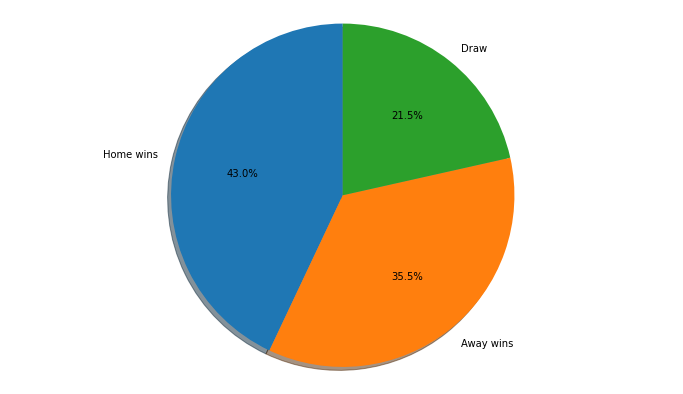

1    722
0    597
2    361
Name: result, dtype: int64

In [23]:
labels = 'Home wins', 'Away wins', 'Draw'


plt.figure(figsize=(12,7))
plt.pie(data.result.value_counts(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

data.result.value_counts()

In [24]:
learning_columns = [
 'average_cards_per_match_pre_match',
 'average_goals_per_match_pre_match',
 'average_possession_away',
 'average_possession_home',
 'away_last_5',
 'away_last_all',
 'away_wins_vs',
 'clean_sheet_percentage_away',
 'clean_sheet_percentage_home',
 'draw_at_half_time_away',
 'draw_at_half_time_home',
 'draws_away',
 'draws_away_away',
 'draws_away_home',
 'draws_home',
 'draws_home_away',
 'draws_home_home',
 'draws_vs',
 'goals_conceded_per_match_half_time_away_away',
 'goals_conceded_per_match_half_time_away_home',
 'goals_scored_away',
 'goals_scored_home',
 'goals_scored_per_match_away',
 'goals_scored_per_match_home',
 'home_advantage_percentage_away',
 'home_advantage_percentage_home',
 'home_last_5',
 'home_last_all',
 'home_wins_vs',
 'leading_at_half_time_away_away',
 'leading_at_half_time_away_home',
 'leading_at_half_time_percentage_away',
 'leading_at_half_time_percentage_home',
 'losing_at_half_time_percentage_away',
 'losing_at_half_time_percentage_home',
 'losses_away_away',
 'losses_away_home',
 'points_per_game_away',
 'points_per_game_home',
 'shots_on_target_away',
 'shots_on_target_home',
 'win_percentage_away_away',
 'win_percentage_away_home',
 'wins_away_away',
 'wins_away_home',
 'result',
]

len(learning_columns)



46

In [25]:
data_learning = data[data.status == 'complete']
data_learning = data_learning[learning_columns]

data_learning = data_learning.dropna()

X = data_learning.drop(['result'],1)
y = data_learning.result

X.head()

,average_cards_per_match_pre_match,average_goals_per_match_pre_match,average_possession_away,average_possession_home,away_last_5,away_last_all,away_wins_vs,clean_sheet_percentage_away,clean_sheet_percentage_home,draw_at_half_time_away,...,losses_away_away,losses_away_home,points_per_game_away,points_per_game_home,shots_on_target_away,shots_on_target_home,win_percentage_away_away,win_percentage_away_home,wins_away_away,wins_away_home
0,0.0,0.0,48,52,0,0,5,47,27,30,...,5,5,1.60,1.30,136,169,33,27,5,4
1,0.0,0.0,50,46,0,0,1,20,30,30,...,8,9,1.27,0.97,131,156,7,7,1,1
2,0.0,0.0,56,50,0,0,8,40,50,30,...,4,5,1.93,1.17,162,99,47,20,7,3
3,0.0,0.0,48,55,0,0,3,27,50,30,...,7,7,1.10,1.83,90,134,7,33,1,5
4,0.0,0.0,52,51,0,0,4,20,27,30,...,8,9,1.03,1.20,145,97,20,20,3,3


## Decision tree

In [26]:

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.metrics import balanced_accuracy_score

# Shuffle and split the dataset into training and testing set.

X = X[ list(X.columns.unique()) ] #making sure there is no duplicates

seed = 56

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = seed,
                                                    stratify = y)



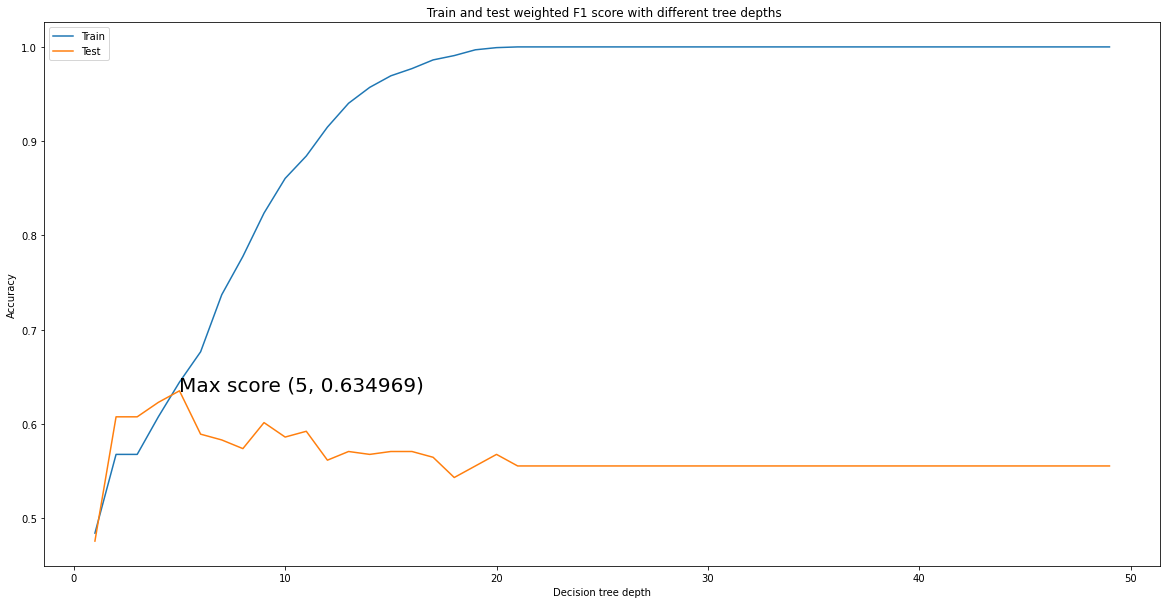

In [27]:

D_test = dict()
D_train = dict()


max_depth = 50

for depth in range(1,max_depth):

    clf = tree.DecisionTreeClassifier(max_depth= depth,random_state=seed)

    clf.fit(X_train, y_train)    

    y_pred = clf.predict(X_test)

    # score_train = f1_score(y_train,clf.predict(X_train),  average='weighted')
    # score_test = f1_score( y_test,y_pred, average='weighted')

    # score_train = balanced_accuracy_score(y_train,clf.predict(X_train))
    # score_test = balanced_accuracy_score(y_test,y_pred)

    score_train = sum(clf.predict(X_train) == y_train) / len(y_train)
    score_test = sum(y_pred == y_test) / len(y_test)


    D_test[depth] = score_test
    D_train[depth] = score_train

plt.subplots(figsize=(20, 10))

plt.plot( list(D_train.keys()), list(D_train.values()),label = "Train")

plt.plot( list(D_test.keys()), list(D_test.values()),label = "Test")



plt.xlabel('Decision tree depth')
plt.ylabel('Accuracy')
# Set a title of the current axes.
plt.title(' Train and test weighted F1 score with different tree depths')
# show a legend on the plot
plt.legend()

best_depth = max(D_test, key=D_test.get)
best_score = D_test[best_depth]


plt.text(best_depth,best_score, 'Max score ({}, {:.6f})'.format(best_depth,best_score),fontsize=20)

plt.show()

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# CLASSIFICATION REPORT

''' 
Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

F1 score is a weighted harmonic mean of precision and recall
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
'''


clf_decision_tree = tree.DecisionTreeClassifier(max_depth= best_depth,random_state=seed)
clf_decision_tree.fit(X_train, y_train)
y_pred = clf_decision_tree.predict(X_test)

print('\n'+classification_report(y_test, y_pred, target_names=['draw','home','away']))

print("Weighted F1 score:", f1_score(y_test, y_pred, average='weighted')) 
print("Balanced accuracy:", balanced_accuracy_score(y_test,y_pred))
print("Accuracy:",sum(y_pred == y_test) / len(y_test))




              precision    recall  f1-score   support

        draw       0.71      0.50      0.58       109
        home       0.66      0.80      0.72       145
        away       0.51      0.51      0.51        72

    accuracy                           0.63       326
   macro avg       0.62      0.60      0.60       326
weighted avg       0.64      0.63      0.63       326

Weighted F1 score: 0.6283721156689581
Balanced accuracy: 0.603100577641862
Accuracy: 0.6349693251533742


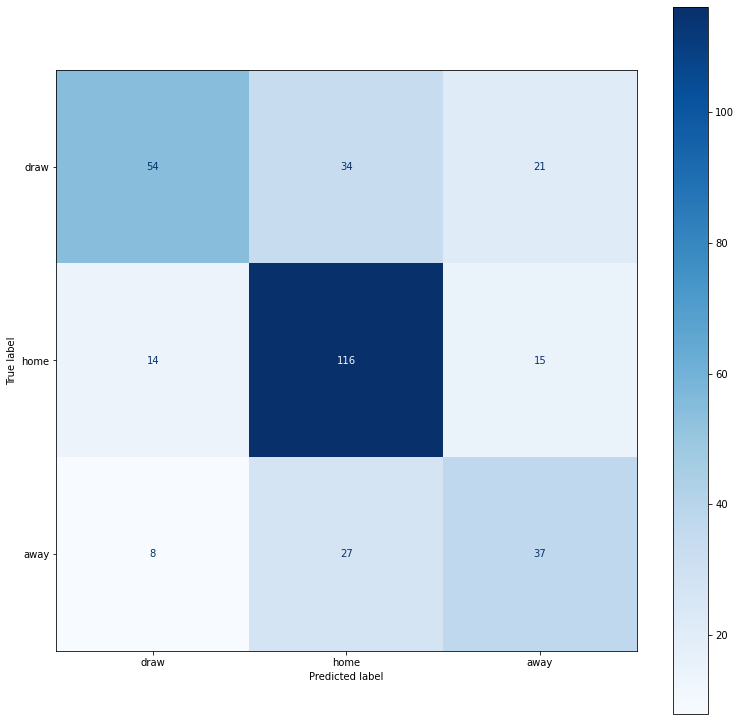

In [29]:
# CONFUSION MATRIX

from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(13, 13))
plot_confusion_matrix(clf_decision_tree, X_test, y_test,
                                 display_labels=['draw','home','away'],
                                 cmap=plt.cm.Blues,
                                 ax=ax)

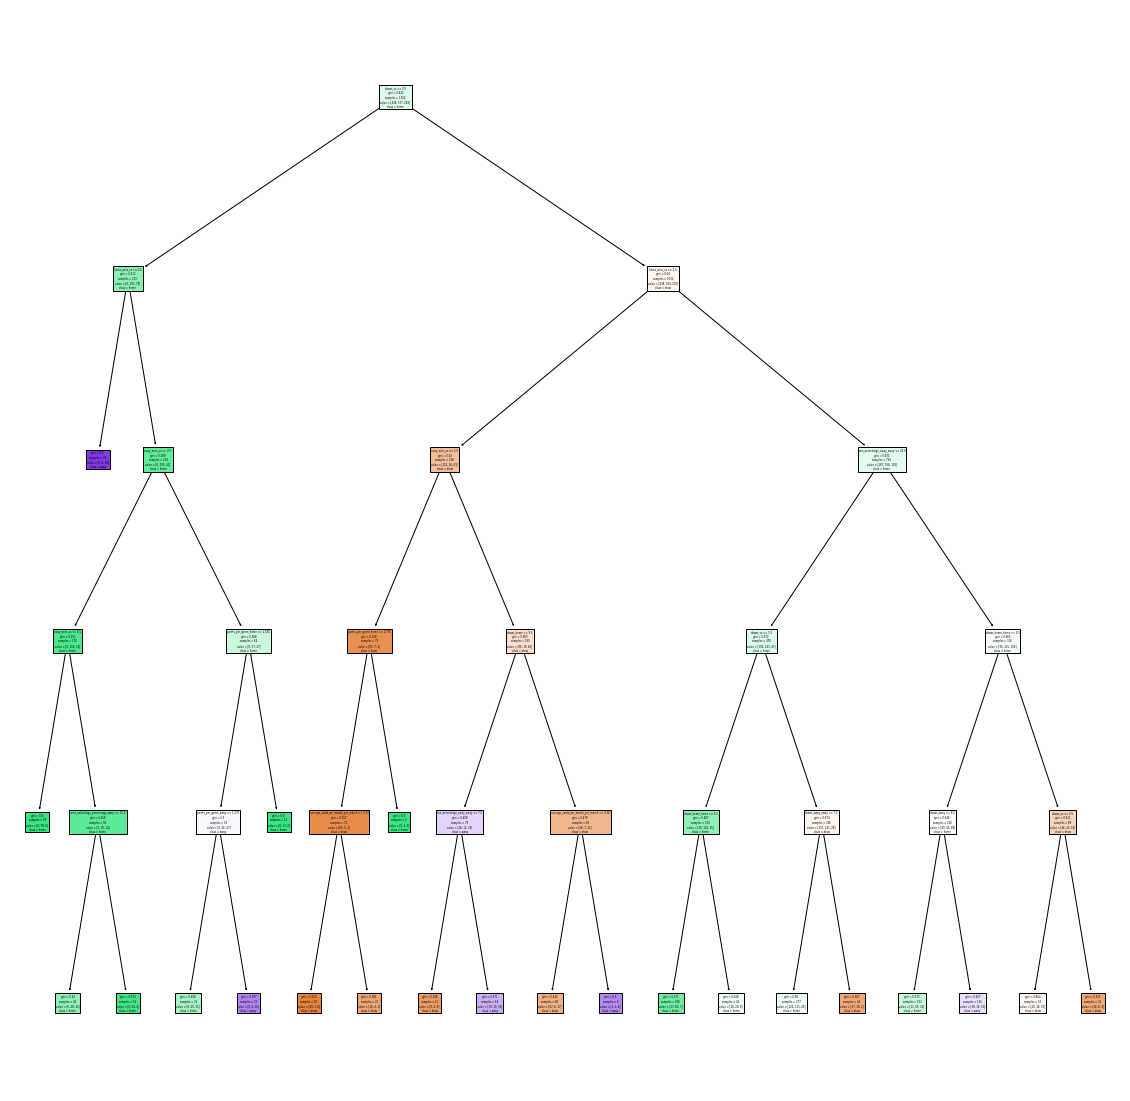

In [30]:

# DECISION TREE PLOT

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_decision_tree, 
                feature_names=X.columns,  
                class_names=['draw','home','away'],
                filled=True)

## Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


clf_random_forest = RandomForestClassifier(max_depth=best_depth)

clf_random_forest.fit(X_train, y_train)

y_pred = clf_random_forest.predict(X_test)

# ACCURACY

accuracy = sum ( y_pred == y_test) / len(y_test)
print("Test accuracy : ",accuracy)


Test accuracy :  0.6625766871165644


In [32]:

# CLASSIFICATION REPORT

''' 
Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

F1 score is a weighted harmonic mean of precision and recall
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
'''

print('\n'+classification_report(y_test, y_pred, target_names=['draw','home','away']))


              precision    recall  f1-score   support

        draw       0.67      0.60      0.63       109
        home       0.66      0.81      0.73       145
        away       0.65      0.47      0.55        72

    accuracy                           0.66       326
   macro avg       0.66      0.63      0.64       326
weighted avg       0.66      0.66      0.66       326



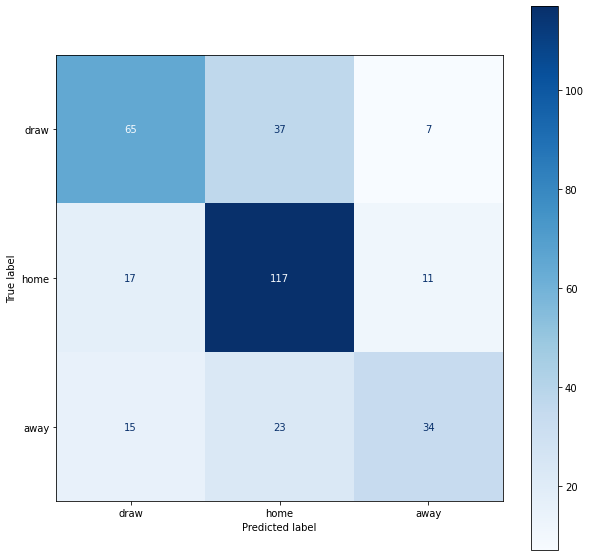

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_random_forest, X_test, y_test,
                                 display_labels=['draw','home','away'],
                                 cmap=plt.cm.Blues,
                                 ax=ax)

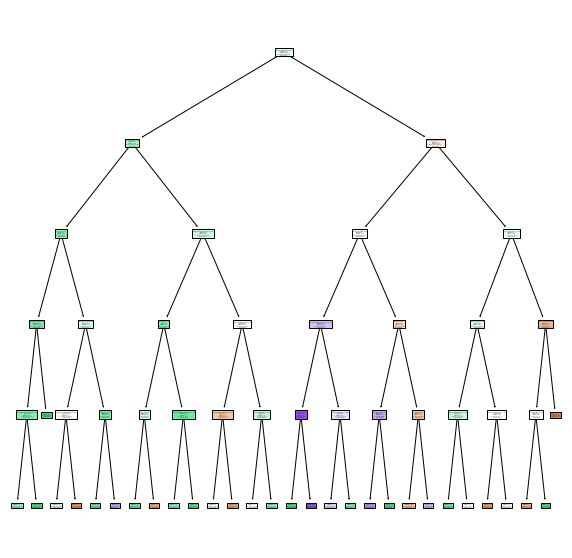

In [34]:
# Plotting fisrt decision tree of the ensemble

decision_tree = clf_random_forest.estimators_[0]

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(decision_tree, 
                feature_names=X.columns,  
                class_names=['draw','home','away'],
                filled=True)

## XGBoost

In [35]:
import xgboost as xgb 

xgb_model = xgb.XGBClassifier(objective="multi:softprob")
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# ACCURACY

accuracy = sum ( y_pred == y_test) / len(y_test)
print("Test accuracy : ",accuracy)


Test accuracy :  0.6319018404907976


In [36]:
# CLASSIFICATION REPORT

''' 
Precision – Accuracy of positive predictions - axis 1 on the confusion matrix
Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified - axis 0 on the confusion matrix
Recall = TP/(TP+FN)

F1 score is a weighted harmonic mean of precision and recall
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
'''

print('\n'+classification_report(y_test, y_pred, target_names=['draw','home','away']))


              precision    recall  f1-score   support

        draw       0.63      0.62      0.63       109
        home       0.66      0.70      0.68       145
        away       0.56      0.50      0.53        72

    accuracy                           0.63       326
   macro avg       0.62      0.61      0.61       326
weighted avg       0.63      0.63      0.63       326



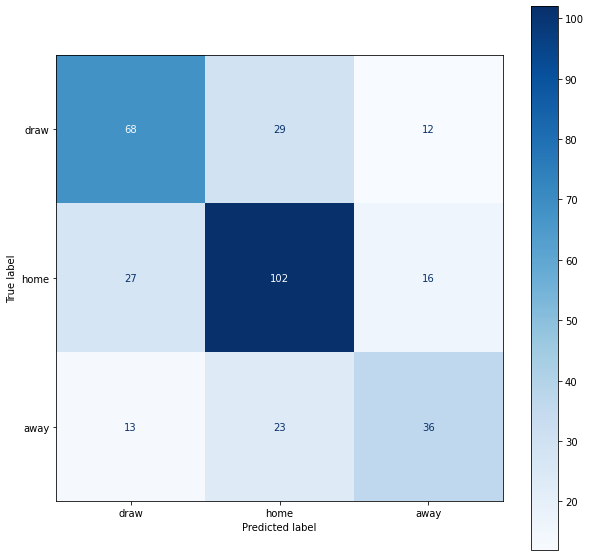

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(xgb_model, X_test, y_test,
                                 display_labels=['draw','home','away'],
                                 cmap=plt.cm.Blues,
                                 ax=ax)

## Dimension reduction for visualization

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

In [ ]:
tsne_results.shape

In [ ]:
colors = ['red','green','blue']

fig, ax = plt.subplots(figsize=(10, 10))

color= [ 'red' if l == 0 else ('green' if l == 1 else 'blue') for l in y[:]]
plt.scatter(tsne_results[:,0], tsne_results[:,1], color=color)

## Cross-validation for decision tree optimization

In [38]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': range(3,20) }

clf = GridSearchCV(tree.DecisionTreeClassifier(),
                   param_grid = parameters, 
                   n_jobs=-1, # -1 to use all threads
                   verbose=5)

clf.fit(X_train,y_train)

tree_model = clf.best_estimator_

time.sleep(1)
print()

print ("Best score: ",clf.best_score_,", best parameters: ", clf.best_params_) 

y_pred = clf.predict(X_test)

# ACCURACY

accuracy = sum ( y_pred == y_test) / len(y_pred)
print("Test accuracy: ",accuracy)


Fitting 5 folds for each of 17 candidates, totalling 85 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  70 out of  85 | elapsed:    4.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    4.0s finished

Best score:  0.5774329501915709 , best parameters:  {'max_depth': 4}
Test accuracy:  0.6226993865030674


In [39]:
# CLASSIFICATION REPORT

''' 
Precision – Accuracy of positive predictions - axis 1 on the confusion matrix
Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified - axis 0 on the confusion matrix
Recall = TP/(TP+FN)

F1 score is a weighted harmonic mean of precision and recall
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
'''

print('\n'+classification_report(y_test, y_pred, target_names=['draw','home','away']))


              precision    recall  f1-score   support

        draw       0.59      0.68      0.63       109
        home       0.67      0.67      0.67       145
        away       0.58      0.44      0.50        72

    accuracy                           0.62       326
   macro avg       0.61      0.60      0.60       326
weighted avg       0.62      0.62      0.62       326

